In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
df=pd.read_csv("instagram_data.csv")
df

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,owner_id,owner_username,shortcode,is_video,caption,comments,likes,created_at,location,imageUrl,multiple_images,username,followers,following
0,36063641,christendominique,C3_GS1ASeWI,False,I’m a brunch & Iced Coffee girlie☕️🍳 \n\nTop @...,268,16382,1709326758,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t39....,True,christendominique,2144626.0,1021.0
1,36063641,christendominique,C38ivgNS3IX,True,😮‍💨Brow tips I really wish I would have know w...,138,9267,1709241048,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0
2,36063641,christendominique,C35-Dd9SO1b,True,OMG I can’t believe it’s already been 1 yr sin...,1089,10100,1709154707,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0
3,36063641,christendominique,C33TadDMisq,True,90’s Glam was Pam! \n\nMakeup \n@smashboxcosme...,271,6943,1709065322,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0
4,36063641,christendominique,C3s-Cm1yCba,True,Chiseled & Sculptured 🏛️\n\n Contour @westmana...,145,17158,1708718486,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,1552043361,el_kilombo,C3_GSnJuc_n,False,Snoop Dogg se aventuró en la programación infa...,71,7519,1709326756,NaN,https://instagram.fkiv3-1.fna.fbcdn.net/v/t39....,False,el_kilombo,4841844.0,1015.0
995,1552043361,el_kilombo,C3-3lf7upwU,False,Perdón 😬,32,21427,1709319047,NaN,https://instagram.fkiv3-1.fna.fbcdn.net/v/t39....,False,el_kilombo,4841844.0,1015.0
996,1552043361,el_kilombo,C3-2X4PuDNg,False,El director James Gunn anuncia que ha comenzad...,37,5234,1709318411,NaN,https://instagram.fkiv3-1.fna.fbcdn.net/v/t39....,True,el_kilombo,4841844.0,1015.0
997,1552043361,el_kilombo,C3-vi6BuXue,True,🐼🎋\n\n🎥: @chinapandafanlily,89,27490,1709314921,NaN,https://instagram.fkiv3-1.fna.fbcdn.net/v/t51....,False,el_kilombo,4841844.0,1015.0


In [131]:
df.head()

,owner_id,owner_username,shortcode,is_video,caption,comments,likes,created_at,location,imageUrl,multiple_images,username,followers,following
0,36063641,christendominique,C3_GS1ASeWI,False,I’m a brunch & Iced Coffee girlie☕️🍳 \n\nTop @...,268,16382,1709326758,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t39....,True,christendominique,2144626.0,1021.0
1,36063641,christendominique,C38ivgNS3IX,True,😮‍💨Brow tips I really wish I would have know w...,138,9267,1709241048,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0
2,36063641,christendominique,C35-Dd9SO1b,True,OMG I can’t believe it’s already been 1 yr sin...,1089,10100,1709154707,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0
3,36063641,christendominique,C33TadDMisq,True,90’s Glam was Pam! \n\nMakeup \n@smashboxcosme...,271,6943,1709065322,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0
4,36063641,christendominique,C3s-Cm1yCba,True,Chiseled & Sculptured 🏛️\n\n Contour @westmana...,145,17158,1708718486,NaN,https://instagram.flba2-1.fna.fbcdn.net/v/t51....,False,christendominique,2144626.0,1021.0


In [132]:
df.tail()

,owner_id,owner_username,shortcode,is_video,caption,comments,likes,created_at,location,imageUrl,multiple_images,username,followers,following
994,1552043361,el_kilombo,C3_GSnJuc_n,False,Snoop Dogg se aventuró en la programación infa...,71,7519,1709326756,NaN,https://instagram.fkiv3-1.fna.fbcdn.net/v/t39....,False,el_kilombo,4841844.0,1015.0
995,1552043361,el_kilombo,C3-3lf7upwU,False,Perdón 😬,32,21427,1709319047,NaN,https://instagram.fkiv3-1.fna.fbcdn.net/v/t39....,False,el_kilombo,4841844.0,1015.0
996,1552043361,el_kilombo,C3-2X4PuDNg,False,El director James Gunn anuncia que ha comenzad...,37,5234,1709318411,NaN,https://instagram.fkiv3-1.fna.fbcdn.net/v/t39....,True,el_kilombo,4841844.0,1015.0
997,1552043361,el_kilombo,C3-vi6BuXue,True,🐼🎋\n\n🎥: @chinapandafanlily,89,27490,1709314921,NaN,https://instagram.fkiv3-1.fna.fbcdn.net/v/t51....,False,el_kilombo,4841844.0,1015.0
998,12148448,emilyschuman,C4BPuM9xuNU,True,In my long nail era (and how I apply press-ons...,32,1515,1709398859,NaN,https://instagram.fkiv2-1.fna.fbcdn.net/v/t51....,False,emilyschuman,602683.0,1298.0


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   owner_id         999 non-null    int64  
 1   owner_username   999 non-null    object 
 2   shortcode        999 non-null    object 
 3   is_video         999 non-null    bool   
 4   caption          991 non-null    object 
 5   comments         999 non-null    int64  
 6   likes            999 non-null    int64  
 7   created_at       999 non-null    int64  
 8   location         360 non-null    object 
 9   imageUrl         999 non-null    object 
 10  multiple_images  999 non-null    bool   
 11  username         883 non-null    object 
 12  followers        883 non-null    float64
 13  following        883 non-null    float64
dtypes: bool(2), float64(2), int64(4), object(6)
memory usage: 95.7+ KB


**missing values in colums**

In [134]:
df.isnull().sum()

,0
owner_id,0
owner_username,0
shortcode,0
is_video,0
caption,8
comments,0
likes,0
created_at,0
location,639
imageUrl,0


**Preprocess captions removing special chars and converting to lowecase**

In [135]:
df['caption'] = df['caption'].str.replace('[^\w\s]', '')  # Remove special chars
df['caption'] = df['caption'].str.lower()         # Convert to lowercase

**Filling missing values**

In [136]:
df['location'] = df['location'].fillna('Unknown')  # Non-numeric column
df['username'] = df['username'].fillna('NoUsername')  # Non-numeric column
df['followers'] = df['followers'].fillna(df['followers'].mean())  # Numeric column
df['following'] = df['following'].fillna(df['following'].mean())  # Numeric column
df['caption'] = df['caption'].astype(str)


**Check the missing values in colums**

In [137]:
print(df.isnull().sum())


owner_id           0
owner_username     0
shortcode          0
is_video           0
caption            0
comments           0
likes              0
created_at         0
location           0
imageUrl           0
multiple_images    0
username           0
followers          0
following          0
dtype: int64


**Sentiment Analysis**

In [138]:
sid = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['caption'].apply(lambda x: sid.polarity_scores(x)['compound'])

**Classify sentiment**

In [139]:
df['sentiment'] = pd.cut(df['sentiment_score'], bins=[-1, -0.01, 0.01, 1], labels=['Negative', 'Neutral', 'Positive'])

**Visualize sentiment trends over time**

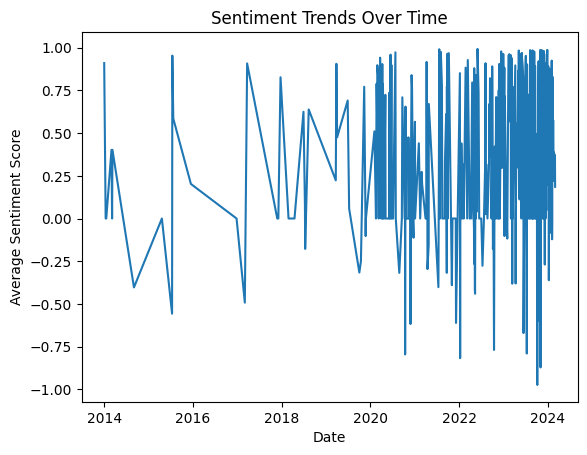

In [140]:
df['created_at'] = pd.to_datetime(df['created_at'], unit='s')
df['date'] = df['created_at'].dt.date
sentiment_trends = df.groupby('date')['sentiment_score'].mean()
plt.plot(sentiment_trends)
plt.title('Sentiment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.show()

**Sentiment Distribution**

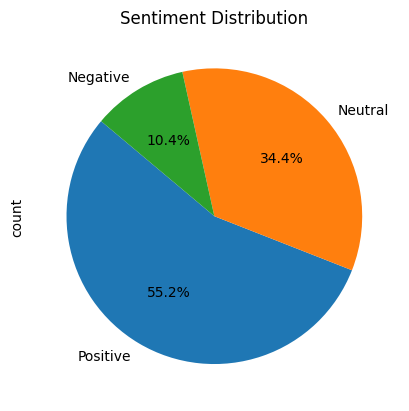

In [141]:
df['sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.show()

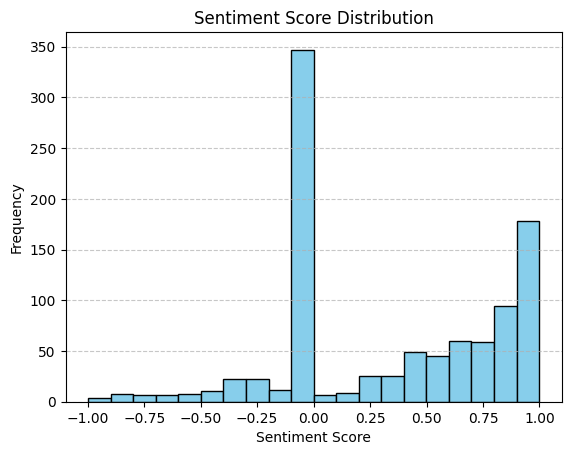

In [142]:
plt.hist(df['sentiment_score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<ipython-input-143-9ccc2cfb375c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='sentiment_score', data=df, palette='Set2')


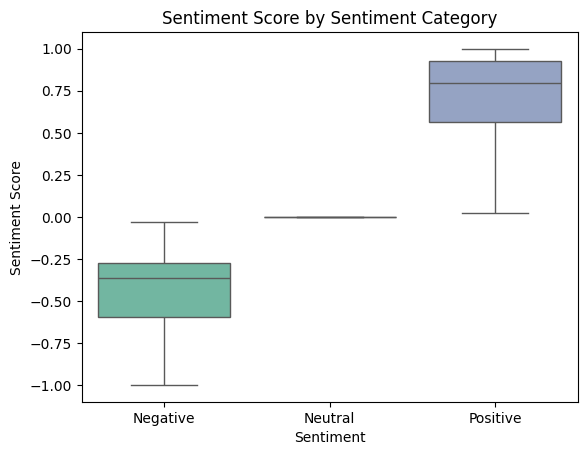

In [143]:
import seaborn as sns

sns.boxplot(x='sentiment', y='sentiment_score', data=df, palette='Set2')
plt.title('Sentiment Score by Sentiment Category')
plt.xlabel('Sentiment')
plt.ylabel('Sentiment Score')
plt.show()


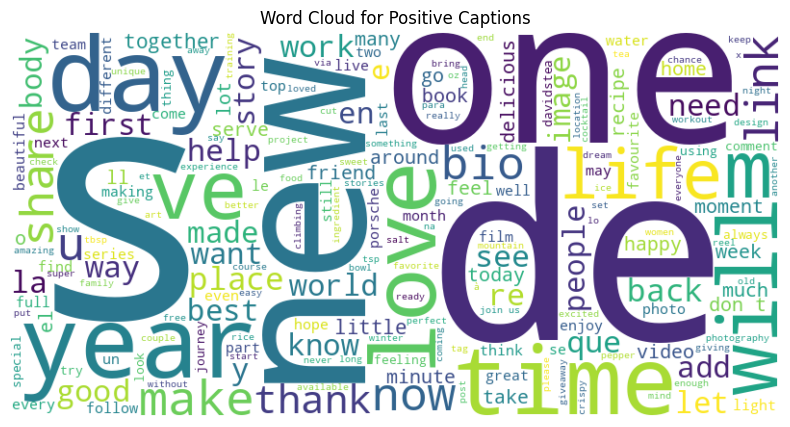

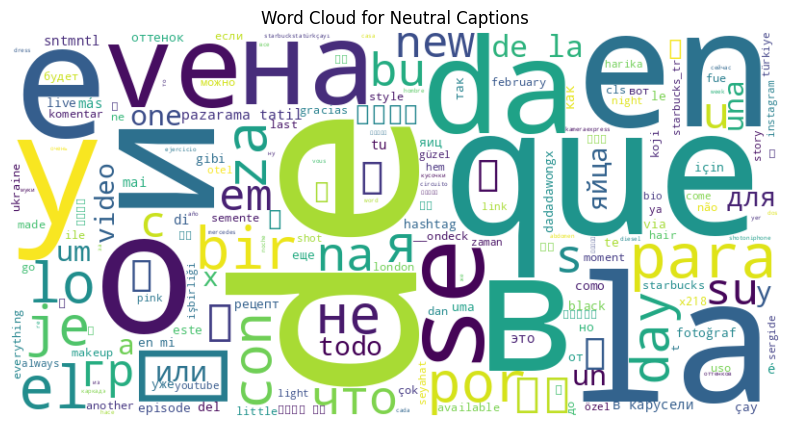

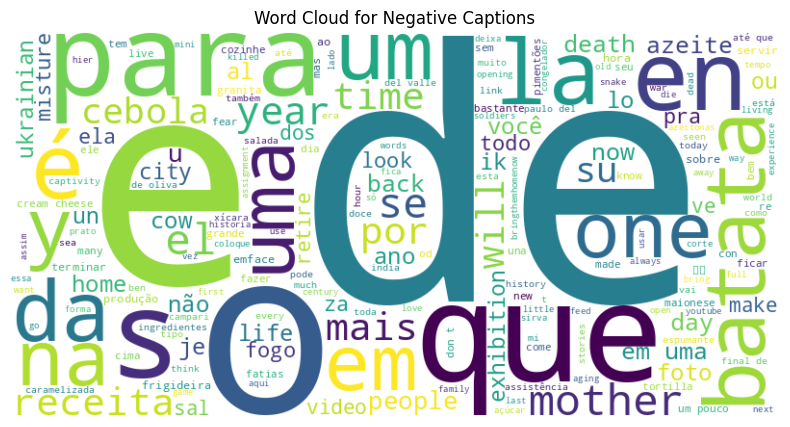

In [144]:
from wordcloud import WordCloud

for sentiment in ['Positive', 'Neutral', 'Negative']:
    text = ' '.join(df[df['sentiment'] == sentiment]['caption'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Captions')
    plt.axis('off')
    plt.show()


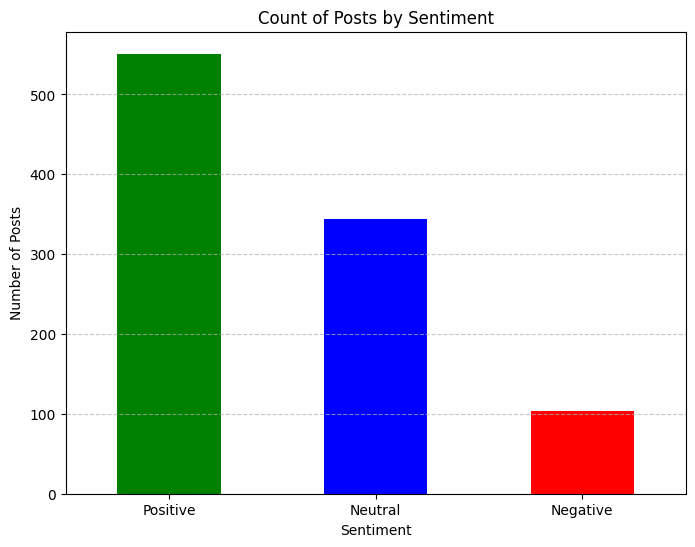

In [145]:
df['sentiment'].value_counts().plot(kind='bar', color=['green', 'blue', 'red'], figsize=(8, 6))
plt.title('Count of Posts by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Number of Posts')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


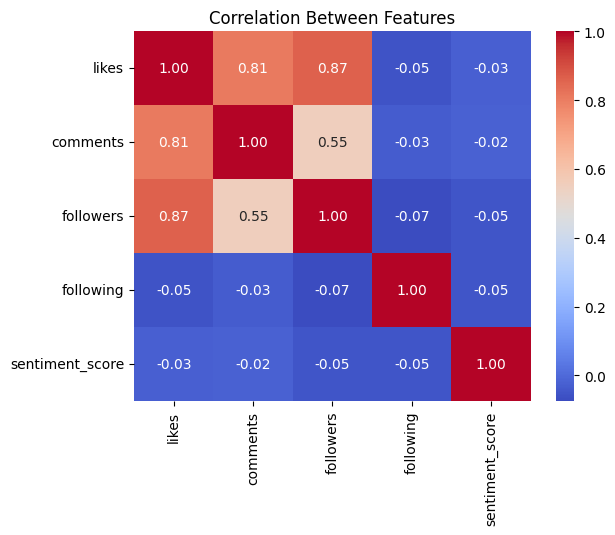

In [146]:
numerical_cols = ['likes', 'comments', 'followers', 'following', 'sentiment_score']
correlation_matrix = df[numerical_cols].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Features')
plt.show()


<ipython-input-147-a700155b335d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='likes', data=df, palette='muted')


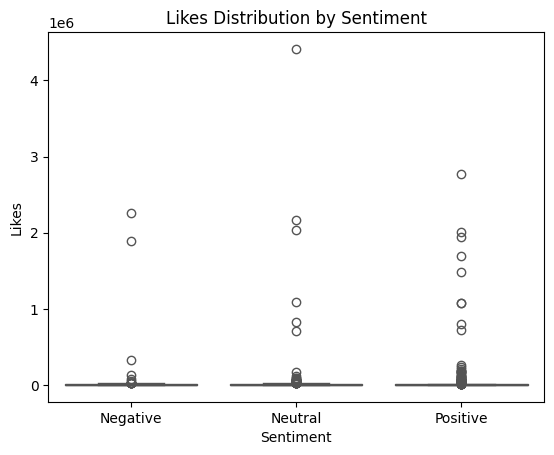

<ipython-input-147-a700155b335d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='comments', data=df, palette='muted')


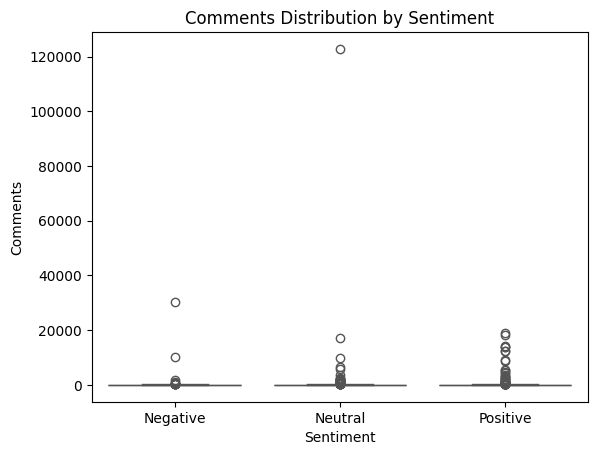

In [147]:
sns.boxplot(x='sentiment', y='likes', data=df, palette='muted')
plt.title('Likes Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Likes')
plt.show()

sns.boxplot(x='sentiment', y='comments', data=df, palette='muted')
plt.title('Comments Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Comments')
plt.show()


###                                                        
#                                                          **Thankyou**